# This file has all the cool plotting code.

In [204]:
import os
import pandas as pd
import re
from rich.console import Console
from rich.table import Table
import math
import seaborn as sns
import matplotlib.pyplot as plt
console = Console()

In [187]:
def pretty_print_data(dfs, size):

    table = Table(title=f"Size {size} | n log n: {round(size * math.log(size, 2), 4)} | 1.5 n log n: {round(size * 1.5 * math.log(size, 2), 4)}")
    table.add_column("")
    table.add_column("Sorted")
    table.add_column("Reverse")
    table.add_column("Random Shuffle")
    table.add_row("Comparisons", str(dfs[size]['sorted']["comparison_count"].mean()), str(dfs[size]['reverse']["comparison_count"].mean()), str(dfs[size]['shuffle']["comparison_count"].mean()))
    table.add_row("Time", str(dfs[size]['sorted']["time"].mean()), str(dfs[size]['reverse']["time"].mean()), str(dfs[size]['shuffle']["time"].mean()))

    console.print(table)

In [188]:
outfile_loc = "output"

In [189]:
heapdfs = {}
quickdfs = {}

In [190]:
for _, _, files in os.walk(outfile_loc):
    for file in files:

        size = int(re.findall(r'size(\d+)', file)[0])
        manip_type = re.findall(r'\d_(\w+).txt', file)[0]

        if "_heap_" in file:
            if size not in heapdfs:
                heapdfs[size] = {}
                heapdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)
            else:
                heapdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)

        elif "_quick_" in file:
            
            if size not in quickdfs:
                quickdfs[size] = {}
                quickdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)
            else:
                quickdfs[size][manip_type] = pd.read_csv(outfile_loc + "/" + file)
                

In [191]:
len(heapdfs), len(quickdfs)

(4, 4)

In [192]:
print("HEAP")
pretty_print_data(heapdfs, 10)
pretty_print_data(heapdfs, 100)
pretty_print_data(heapdfs, 1000)
pretty_print_data(heapdfs, 10000)

HEAP


 Size 10 | n log n: 33.2193 | 1.5 n log n: 49.8289  
┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted  ┃ Reverse ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 42.0    │ 29.0    │ 37.053         │
│ Time        │ 671.577 │ 580.244 │ 813.765        │
└─────────────┴─────────┴─────────┴────────────────┘

  Size 100 | n log n: 664.3856 | 1.5 n log n: 996.5784  
┏━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted    ┃ Reverse   ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 954.0     │ 745.0     │ 850.639        │
│ Time        │ 17819.727 │ 14971.971 │ 18466.897      │
└─────────────┴───────────┴───────────┴────────────────┘

 Size 1000 | n log n: 9965.7843 | 1.5 n log n: 14948.6764 
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted     ┃ Reverse    ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 14632.988  │ 12170.0    │ 13484.568      │
│ Time        │ 253727.791 │ 231915.001 │ 270259.998     │
└─────────────┴────────────┴────────────┴────────────────┘

Size 10000 | n log n: 132877.1238 | 1.5 n log n: 199315.6857
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted      ┃ Reverse     ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 196227.027  │ 171953.701  │ 184434.863     │
│ Time        │ 3930016.048 │ 3267018.365 │ 3705386.575    │
└─────────────┴─────────────┴─────────────┴────────────────┘

In [193]:
print("QUICK")
pretty_print_data(quickdfs, 10)
pretty_print_data(quickdfs, 100)
pretty_print_data(quickdfs, 1000)
pretty_print_data(quickdfs, 10000)

QUICK


 Size 10 | n log n: 33.2193 | 1.5 n log n: 49.8289  
┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted  ┃ Reverse ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 29.0    │ 49.0    │ 28.42          │
│ Time        │ 523.876 │ 699.142 │ 824.198        │
└─────────────┴─────────┴─────────┴────────────────┘

  Size 100 | n log n: 664.3856 | 1.5 n log n: 996.5784  
┏━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted    ┃ Reverse   ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 2549.0    │ 4999.0    │ 694.842        │
│ Time        │ 22563.329 │ 37083.615 │ 15591.778      │
└─────────────┴───────────┴───────────┴────────────────┘

  Size 1000 | n log n: 9965.7843 | 1.5 n log n: 14948.6764  
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted      ┃ Reverse     ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 250499.414  │ 499997.692  │ 11496.98       │
│ Time        │ 1903279.707 │ 3227244.868 │ 196763.218     │
└─────────────┴─────────────┴─────────────┴────────────────┘

  Size 10000 | n log n: 132877.1238 | 1.5 n log n: 199315.6857  
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃             ┃ Sorted        ┃ Reverse       ┃ Random Shuffle ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Comparisons │ 25004925.819  │ 49998684.722  │ 160695.07      │
│ Time        │ 190188423.075 │ 318660643.625 │ 2760876.093    │
└─────────────┴───────────────┴───────────────┴────────────────┘

In [194]:
def get_summarized_data(dfs):
    data = pd.DataFrame(columns=["Size", "Type", "Time", "Comparisons"])

    for size in dfs:
        for manip_type in dfs[size]:
            
            tempdf = pd.DataFrame({"Size": size, "Type": manip_type, "Time": dfs[size][manip_type]["time"].mean(), "Comparisons": dfs[size][manip_type]["comparison_count"].mean()}, index=[0])

            data = pd.concat([data, tempdf], ignore_index=True)

    return data

In [195]:
heap_data = get_summarized_data(heapdfs)
quick_data = get_summarized_data(quickdfs)

heap_data["Algorithm"] = "heap"
quick_data["Algorithm"] = "quick"

data = pd.concat([heap_data, quick_data])

/var/folders/65/1rmmptvx50q4_7z2lwbwbhsc0000gn/T/ipykernel_51115/4185973619.py:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/var/folders/65/1rmmptvx50q4_7z2lwbwbhsc0000gn/T/ipykernel_51115/4185973619.py:9: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



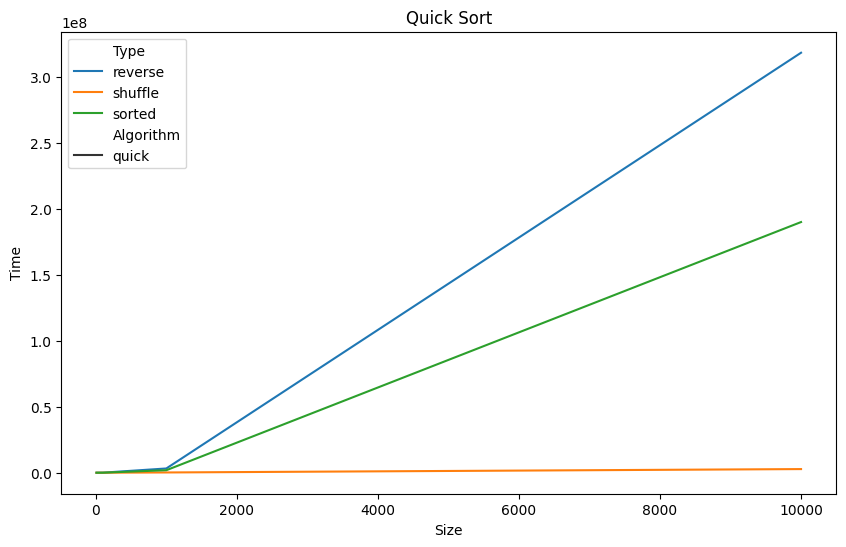

In [215]:
plt.figure(figsize=(10, 6))
plt.title("Quick Sort")
sns.lineplot(data=data[data["Algorithm"] == "quick"], x="Size", y="Time", hue="Type", style="Algorithm")
plt.show()

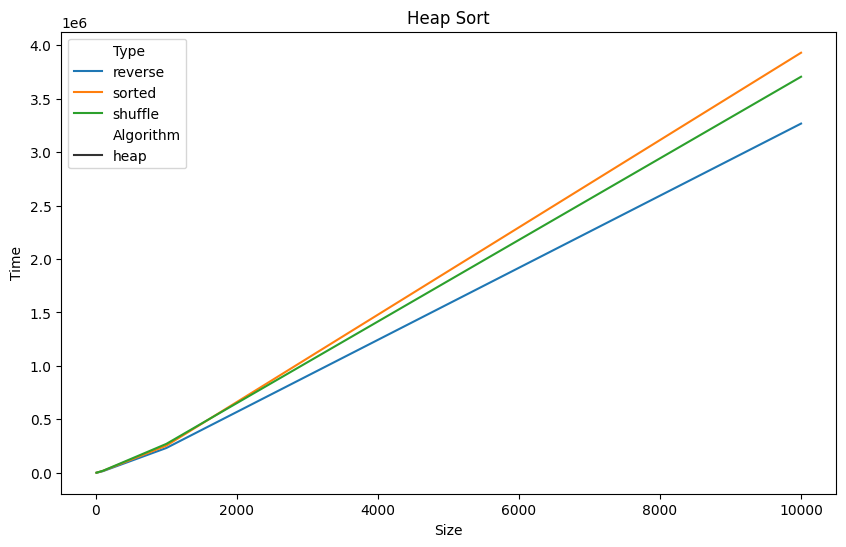

In [216]:
plt.figure(figsize=(10, 6))
plt.title("Heap Sort")
sns.lineplot(data=data[data["Algorithm"] == "heap"], x="Size", y="Time", hue="Type", style="Algorithm")
plt.show()